# Tema: Estudo comparativo entre Métodos de Agrupamento

**Programa**: Santander Coders 2023

**Grupo 3**: Jorge, Karen, Maria, Nathália, Ricardo

**Professor**: Mauricio Sobrinho

Especificações: Neste módulo, vamos fazer um estudo de caso para praticar a análise dos resultados de um projeto de machine learning, você deverá se reunir em um grupo de 4 a 5 pessoas e seguir o passo a passo abaixo.

1. Escolher um dataset com pelo menos 1000 linhas, valide com o professor se o dataset escolhido é válido ou optem pela sugestão de datasets do professor (fontes de datasets: kaggle, UCI, etc). Uma sugestão para quem for escolher por conta é optar por datasets destinados à tarefa de clusterização.
2. Realizar uma análise exploratória aplicando a tarefa não supervisionada de agrupamento com os diferentes algoritmos vistos em aula. Depois trazer um estudo comparativo de resultados em termos de grupos formados, eficiência de execução, métricas de avalição etc.
3. Fiquem à vontade também para explorarem técnicas supervisionadas (classificação, regressão) em conjunto com as técnicas não-supervisionadas (agrupamentos hierárquicos, particionais e baseados em densidade) vistos em aula.

### **Dataset**

Para o projeto proposto, o dataset escolhido tem como foco a clusterização de clientes. A base está disponível no kaggle: https://www.kaggle.com/datasets/dev0914sharma/customer-clustering?select=segmentation+data.csv .

### **Contexto do Dataset**

Você está devendo um supermercado e, por meio de cartões de sócio, tem alguns dados básicos sobre seus clientes, como ID do cliente, idade, sexo, renda anual e pontuação de gastos. Você deseja entender os clientes e saber quem são os clientes-alvo para que o sentido possa ser dado à equipe de marketing e planejar a estratégia de acordo.

### **Descrição das Variáveis**

**Variable	| Data type	| Range	| Description**

#### **ID** numerical	 Integer  Shows a unique identificator of a customer.

#### **Sex**	categorical	{0,1} 	Biological sex (gender) of a customer. In this dataset there are only 2 different options.

		* 0	male
		* 1	female

#### **Marital status**	categorical	{0,1}	Marital status of a customer.

		* 0	single
		* 1	non-single (divorced / separated / married / widowed)

#### **Age**	numerical	Integer	The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of creation of the dataset

		* 18	Min value (the lowest age observed in the dataset)
		* 76	Max value (the highest age observed in the dataset)

#### **Education**	categorical	{0,1,2,3}	Level of education of the customer

		* 0	other / unknown
		* 1	high school
		* 2	university
		* 3	graduate school

#### **Income**	numerical	Real	Self-reported annual income in US dollars of the customer.

		* 35832	Min value (the lowest income observed in the dataset)
		* 309364	Max value (the highest income observed in the dataset)

#### **Occupation**	categorical	{0,1,2}	Category of occupation of the customer.

		* 0	unemployed / unskilled
		* 1	skilled employee / official
		* 2	management / self-employed / highly qualified employee / officer

#### **Settlement size**	categorical	{0,1,2}	The size of the city that the customer lives in.

		* 0	small city
		* 1	mid-sized city
		* 2	big city


### Inspeção Inicial

In [43]:
# Importação de bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [44]:
# Carregando a base
df_customers = pd.read_csv("segmentation_data.csv")

# Visualizar as 5 primeiras linhas da base
df_customers.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [45]:
# Visualizar as 5 últimas linhas:
df_customers.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [46]:
# Visualizar as dimensões do dataset
df_customers.shape

(2000, 8)

In [47]:
# Visualizar os tipos de variáveis
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


A partir dos dados acima, percebe-se que o dataset é composto por 2000 linhas e que possui 8 colunas. Observa-se também que não há dados nulos e que todas as variáveis são numericamente representadas 

In [48]:
# Ainda assim, para verificar se há nulos:
df_customers.isnull().sum().sum()

0

In [49]:
# Verificar se há duplicados:
df_customers.duplicated().sum()

0

Uma vez que a base não possui nulos, nem dados duplicados e todos as variáveis já estão representadas por números, mesmo as que possuem valor semântico como categórica, entende-se que não há maiores preocupações para as etapas de limpeza e transformação de dados.

Nessa etapa de limpeza, a única transformação a ser realizada será dropar a coluna de ID, por entender que o número único de cada cliente, a sua representação individual, não agrega valor para o desempenho do algoritmo.

In [50]:
# Dropar coluna ID
df_customers.drop(columns='ID', inplace=True)

In [51]:
# Visualizar dataset sem ID
df_customers

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


### Análise Exploratória dos Dados

In [52]:
df_customers_eda = df_customers.copy()

In [53]:
df_customers_eda.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [54]:
# Análise da coluna de gênero
df_customers_eda['Sex'].value_counts(normalize=True)

Sex
0    0.543
1    0.457
Name: proportion, dtype: float64

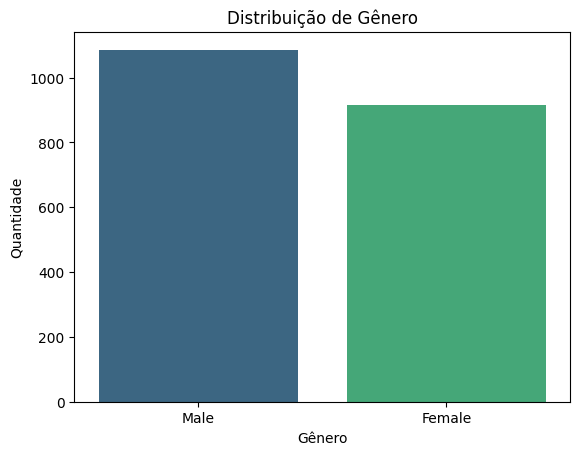

In [55]:
df_customers_eda['Sex'] = df_customers_eda['Sex'].map({0:'Male', 1:'Female'})
sns.countplot(df_customers_eda, x=df_customers_eda['Sex'], palette='viridis').set_title('Distribuição de Gênero')
plt.xlabel('Gênero')
plt.ylabel('Quantidade')
plt.show()

In [56]:
# Análise da coluna de status de casamento
df_customers_eda['Marital status'].value_counts(normalize=True)

Marital status
0    0.5035
1    0.4965
Name: proportion, dtype: float64

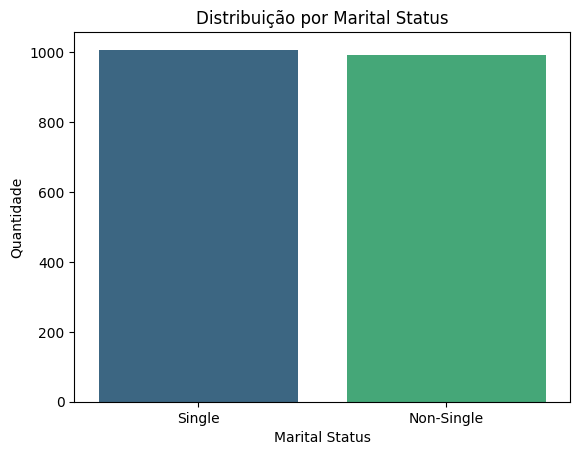

In [57]:
df_customers_eda['Marital status'] = df_customers_eda['Marital status'].map({0:'Single', 1:'Non-Single'})
sns.countplot(df_customers_eda, x=df_customers_eda['Marital status'], palette='viridis').set_title('Distribuição por Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Quantidade')
plt.show()

In [58]:
# Atribudo Age
df_customers_eda['Age'].value_counts()

Age
26    116
27    111
25     88
24     83
28     80
35     79
23     77
31     76
36     73
29     70
30     70
32     67
33     66
34     60
40     58
37     56
38     51
22     49
42     48
39     40
46     35
21     34
41     33
43     33
45     31
44     30
49     29
48     29
47     26
50     23
20     23
57     20
52     19
51     19
54     17
53     16
63     15
64     14
60     13
61     13
65     12
58     12
55     10
67     10
56     10
66      9
62      8
68      7
19      5
59      5
71      5
74      4
70      3
73      3
18      3
75      2
72      1
76      1
Name: count, dtype: int64

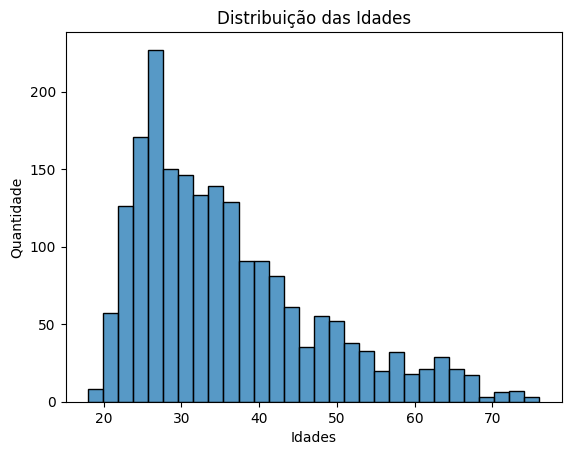

In [59]:
sns.histplot(data=df_customers_eda, x='Age', bins=30)
plt.title("Distribuição das Idades")
plt.xlabel('Idades')
plt.ylabel('Quantidade')
plt.show()

Text(0, 0.5, 'Idade')

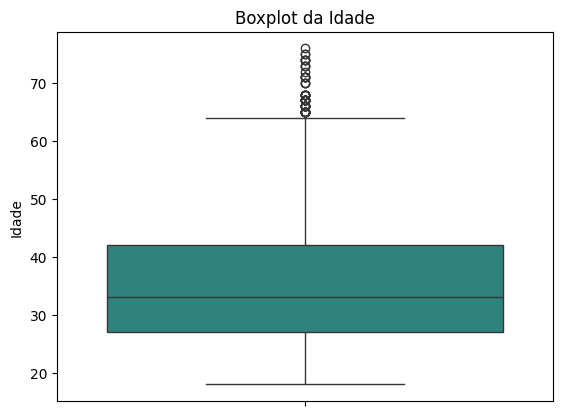

In [60]:
sns.boxplot(data=df_customers_eda, y='Age', palette='viridis')
plt.title('Boxplot da Idade')
plt.ylabel('Idade')

In [61]:
df_customers_eda['Age'].describe()

count    2000.000000
mean       35.909000
std        11.719402
min        18.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        76.000000
Name: Age, dtype: float64

Percebe-se no atributo Idade a presença de outliers no limite superior. 

In [62]:
# Limite superior
q1 = df_customers_eda['Age'].quantile(0.25)
q3 = df_customers_eda['Age'].quantile(0.75)
iqr = q3 - q1
outlier_sup = q3 + 1.5*iqr
outlier_sup

64.5

In [63]:
# Quantidade de outliers:
df_customers_eda['Age'].loc[df_customers_eda['Age']>=outlier_sup].count()

57

In [64]:
# Atributo Educação
df_customers_eda['Education'].value_counts()

Education
1    1386
2     291
0     287
3      36
Name: count, dtype: int64

Text(0, 0.5, 'Escolaridade')

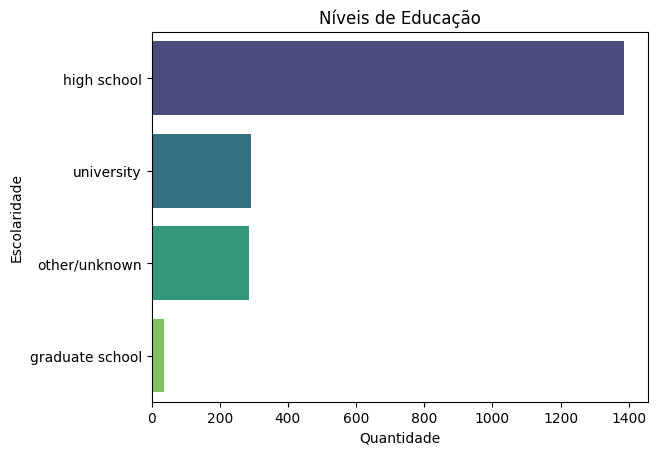

In [65]:
df_customers_eda['Education'] = df_customers_eda['Education'].map({0: 'other/unknown', 1: 'high school', 2:'university', 3:'graduate school'})
sns.countplot(data=df_customers_eda, y='Education', order=df_customers_eda['Education'].value_counts().index, palette='viridis')

plt.title('Níveis de Educação')
plt.xlabel('Quantidade')
plt.ylabel('Escolaridade')

In [66]:
# Atributo Income
df_customers_eda['Income'].value_counts()

Income
83687     2
113619    2
126906    2
120262    2
214364    2
         ..
121400    1
90051     1
111862    1
162772    1
68416     1
Name: count, Length: 1982, dtype: int64

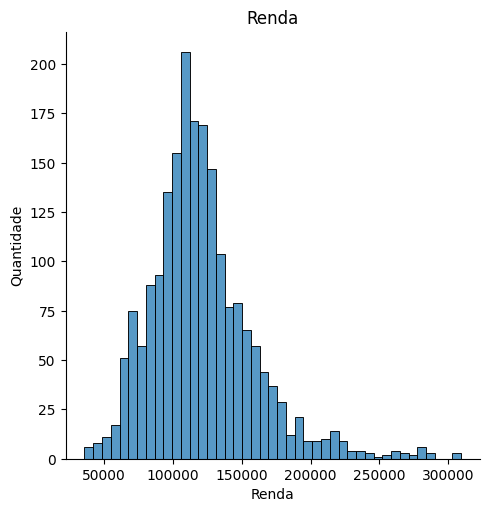

In [67]:
sns.displot(df_customers_eda, x='Income')
plt.title("Renda")
plt.xlabel('Renda')
plt.ylabel('Quantidade')
plt.show()

Text(0, 0.5, 'Renda')

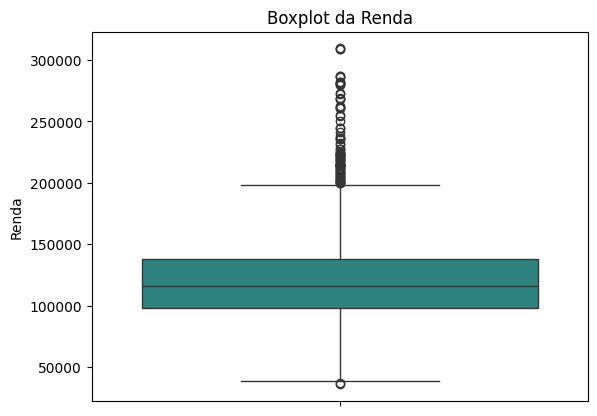

In [68]:
sns.boxplot(data=df_customers_eda, y='Income', palette='viridis')
plt.title('Boxplot da Renda')
plt.ylabel('Renda')

In [69]:
# Limite superior
q1 = df_customers_eda['Income'].quantile(0.25)
q3 = df_customers_eda['Income'].quantile(0.75)
iqr = q3 - q1
outlier_sup = q3 + 1.5*iqr
outlier_sup

# Quantidade de outliers:
df_customers['Income'].loc[df_customers_eda['Income']>=outlier_sup].count()

81

In [70]:
# Atributo Ocupação
df_customers_eda['Occupation'].value_counts()

Occupation
1    1113
0     633
2     254
Name: count, dtype: int64

Text(0, 0.5, 'Ocupação')

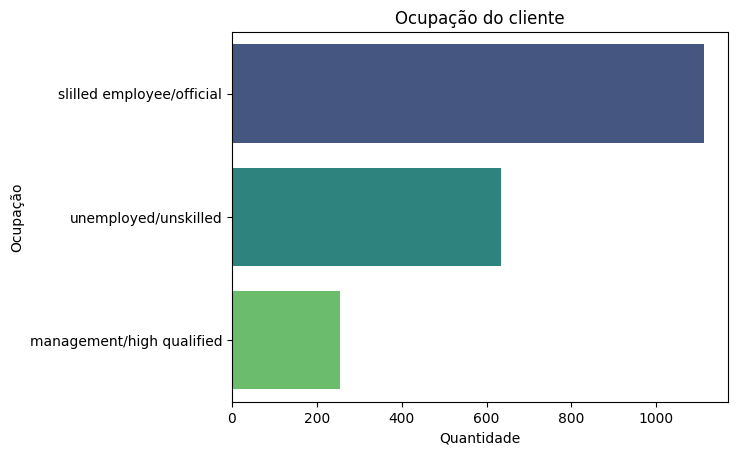

In [71]:
df_customers_eda['Occupation'] = df_customers_eda['Occupation'].map({0: 'unemployed/unskilled', 1: 'slilled employee/official', 2:'management/high qualified'})
sns.countplot(data=df_customers_eda, y='Occupation', order=df_customers_eda['Occupation'].value_counts().index, palette='viridis')

plt.title('Ocupação do cliente')
plt.xlabel('Quantidade')
plt.ylabel('Ocupação')

In [72]:
df_customers_eda['Settlement size'].value_counts()

Settlement size
0    989
1    544
2    467
Name: count, dtype: int64

Text(0, 0.5, 'Tamanho')

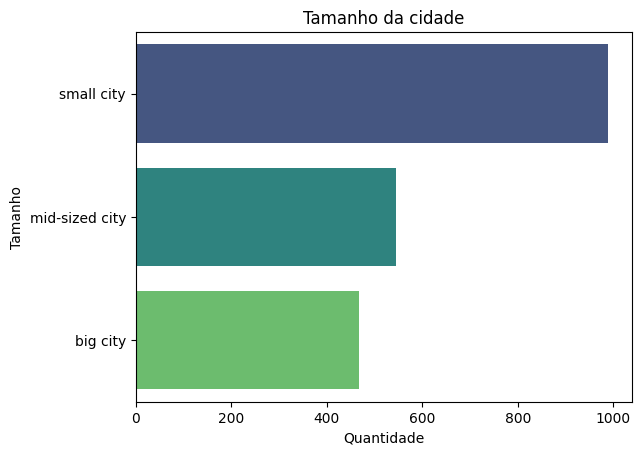

In [73]:
df_customers_eda['Settlement size'] = df_customers_eda['Settlement size'].map({0: 'small city', 1: 'mid-sized city', 2:'big city'})
sns.countplot(data=df_customers_eda, y='Settlement size', order=df_customers_eda['Settlement size'].value_counts().index, palette='viridis')

plt.title('Tamanho da cidade')
plt.xlabel('Quantidade')
plt.ylabel('Tamanho')

In [74]:
# Correlação
df_customers.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


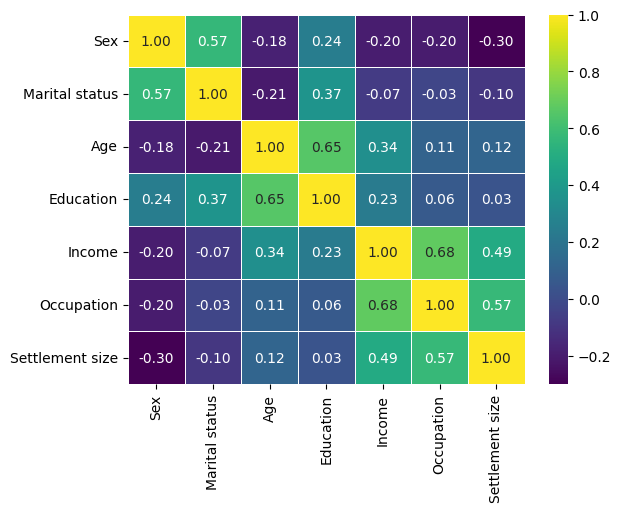

In [75]:
sns.heatmap(df_customers.corr(), linewidths=0.6, annot=True, fmt='.2f', cmap='viridis')
plt.show()

Observa-se maior correlação positiva entre as variáveis Age e Education (0.65) e Income e Occupation (0.68), sugerindo que conforme maior a idade, maior será o nível educacional, bem como maior a renda, maior será o nível ocupacional.

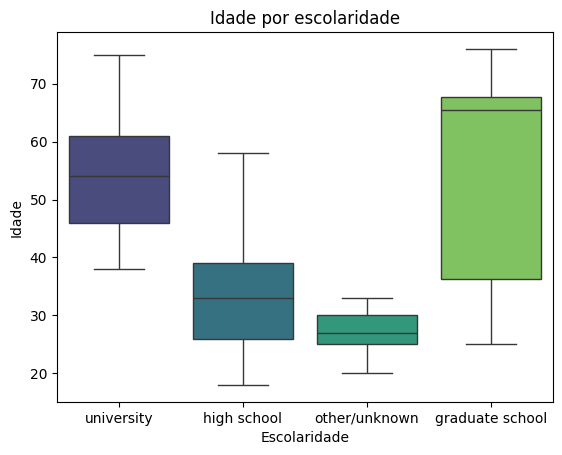

In [76]:
sns.boxplot(data=df_customers_eda, x='Education', y='Age', palette='viridis')
plt.title('Idade por escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Idade')
plt.show()

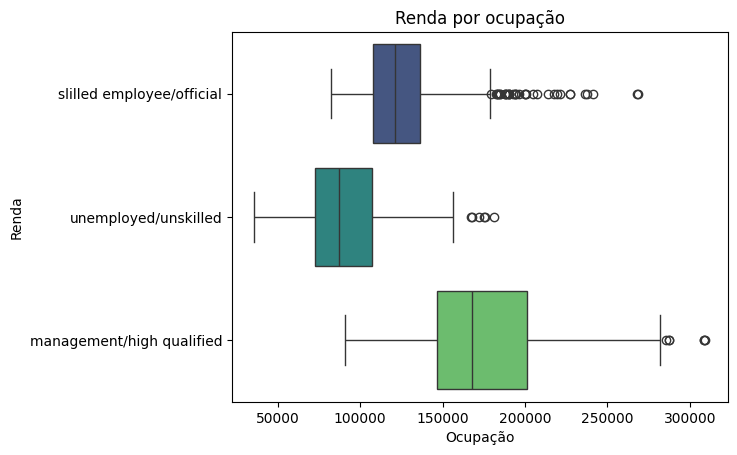

In [81]:
sns.boxplot(data=df_customers_eda, y='Occupation', x='Income', palette='viridis')
plt.title('Renda por ocupação')
plt.ylabel('Renda')
plt.xlabel('Ocupação')
plt.show()

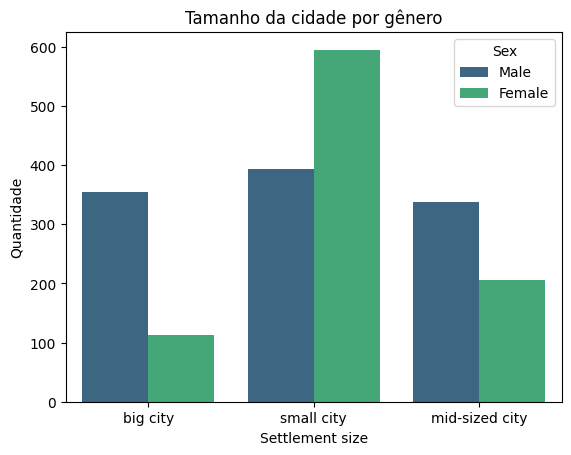

In [78]:
sns.countplot(data=df_customers_eda, x='Settlement size', hue='Sex', palette='viridis')
plt.title('Tamanho da cidade por gênero')
plt.xlabel('Settlement size')
plt.ylabel('Quantidade')
plt.show()

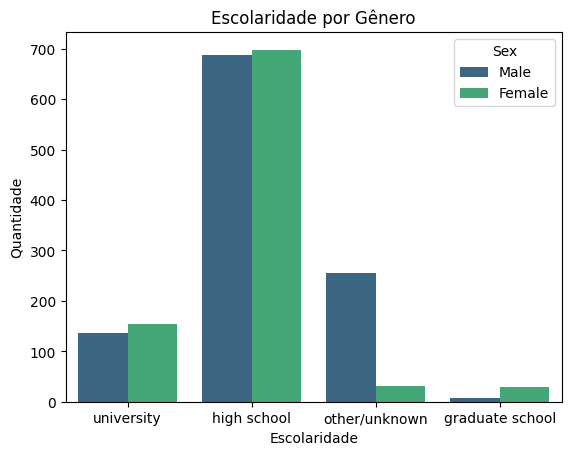

In [79]:
sns.countplot(data=df_customers_eda, x='Education', hue='Sex', palette='viridis')
plt.title('Escolaridade por Gênero')
plt.xlabel('Escolaridade')
plt.ylabel('Quantidade')
plt.show()

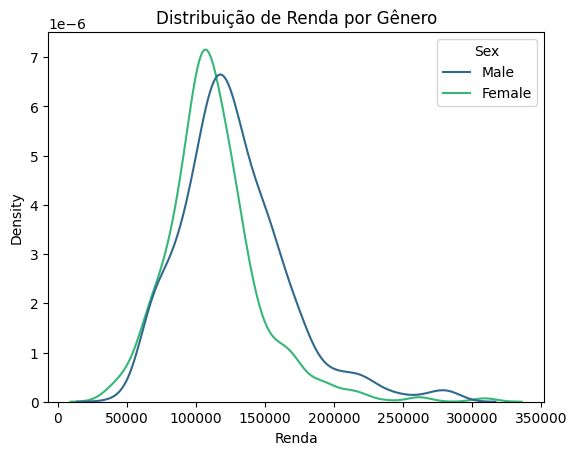

In [80]:
sns.kdeplot(data=df_customers_eda, x='Income', hue='Sex', palette='viridis')
plt.title('Distribuição de Renda por Gênero')
plt.xlabel('Renda')
plt.show()